<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/diabetes.png?raw=true" width=800 align="left"/>

# 실습 내용

- K-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**데이터설명**

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

In [ ]:
# 기술통계 확인
data.describe()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [4]:
# Target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [5]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**3) 정규화**

- KNN 알고리즘을 사용하기 위해 정규화를 진행합니다.

In [6]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

knn은 정규화작업을 꼭해야함.

# 4.성능 예측

- K분할 교차 검증 방법으로 모델 성능을 예측합니다.
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용합니다.
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정합니다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환합니다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있습니다.


**1) Decision Tree**

In [10]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeClassifier(max_depth=5,  random_state=1)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result = {}
result['DecisionTree'] = cv_score.mean()
result

[0.66666667 0.75925926 0.74074074 0.64814815 0.7037037  0.74074074
 0.75925926 0.81132075 0.79245283 0.67924528]
평균: 0.7301537386443047
표준편차: 0.05141448587329709


{'DecisionTree': 0.7301537386443047}

**2) KNN**

In [12]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = KNeighborsClassifier(n_neighbors=5)  # defualt

# 검증하기
cv_score = cross_val_score(model, x_train_s, y_train, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['KNN'] = cv_score.mean()

result

[0.64814815 0.68518519 0.72222222 0.64814815 0.72222222 0.74074074
 0.68518519 0.66037736 0.77358491 0.60377358]
평균: 0.6889587700908455
표준편차: 0.04846522080635871


{'DecisionTree': 0.7301537386443047, 'KNN': 0.6889587700908455}

**3) Logistic Regression**

- LogisticRegression 사용시 발생하는 Warning을 없애려면 충분한 max_iter를 지정합니다.

In [13]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 선언하기
model = LogisticRegression()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['LogisticRegressor'] = cv_score.mean()

result

[0.7037037  0.72222222 0.85185185 0.74074074 0.83333333 0.81481481
 0.74074074 0.75471698 0.77358491 0.75471698]
평균: 0.7690426275331936
표준편차: 0.0464544455418331


{'DecisionTree': 0.7301537386443047,
 'KNN': 0.6889587700908455,
 'LogisticRegressor': 0.7690426275331936}

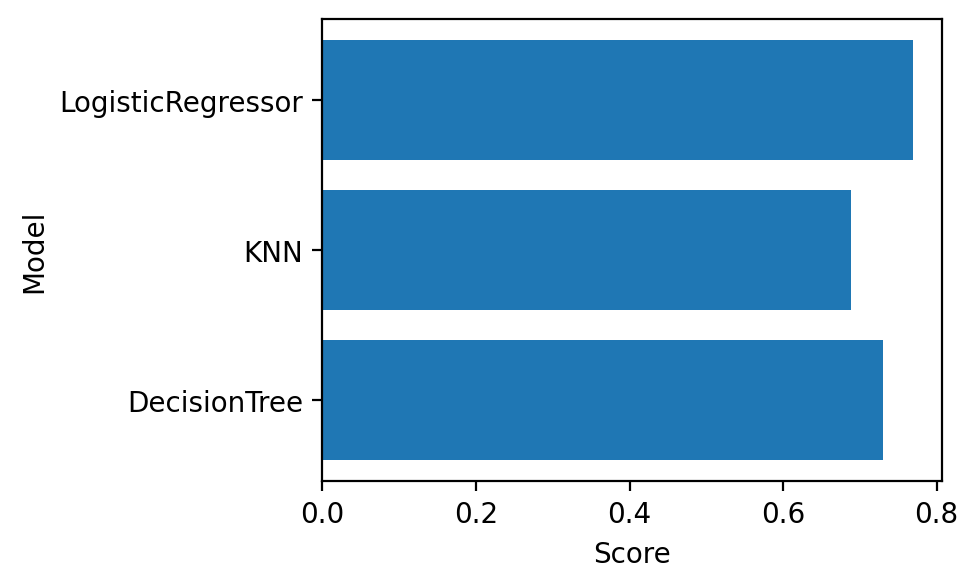

In [23]:
# 성능 비교 시각화 
plt.figure(figsize=(4, 3))
plt.barh(y=list(result), width=result.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

list() 함수는 딕셔너리의 key값을, 데이터프레임의 columns명을 list로 반환해준다.

<- 모델 fitting은 되지 않음